In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [33]:
import pickle 

pickle.format_version

'4.0'

In [2]:
data = pd.read_csv('./dataset.csv')

In [3]:
data.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


### EDA

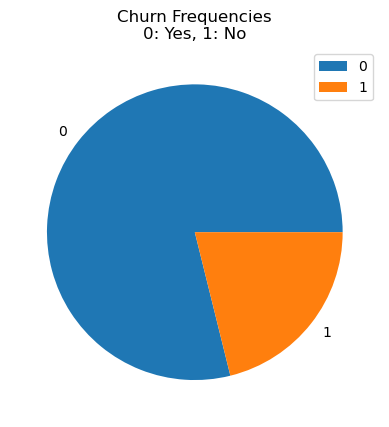

In [4]:
churn_freq = data['churn'].value_counts()

labels = churn_freq.index
value = churn_freq.values

plt.title("Churn Frequencies\n0: Yes, 1: No")
plt.pie(value, labels=labels)
plt.legend()
plt.show()

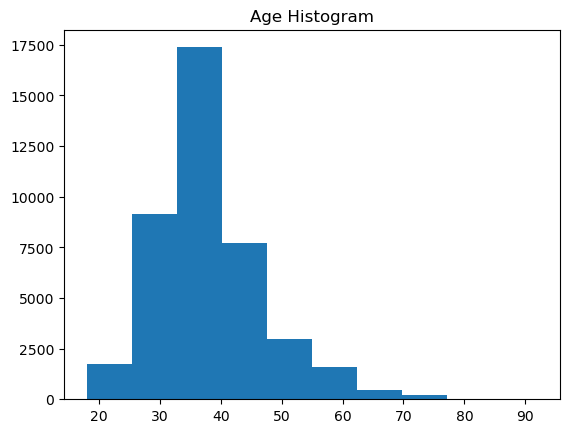

In [5]:
plt.title("Age Histogram")
plt.hist(data['Age'])
plt.show()

### Preprocessing

In [6]:
data.dropna(inplace=True)

In [7]:
columns_to_drop = ['CustomerId', 'id', 'Unnamed: 0', 'Surname']

data.drop(columns=columns_to_drop, inplace=True)

In [8]:
print(data['Geography'].value_counts())
data.head()

France     23513
Spain       9080
Germany     8658
Name: Geography, dtype: int64


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [9]:
encoder = LabelEncoder()

category_columns = ['Gender', 'Geography']

for col in category_columns : 
    data[col] = encoder.fit_transform(data[col])

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,0,0,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,0,1,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,1,0,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,0,0,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,1,0,46.0,4,107720.57,1,0,0,93832.33,1


In [10]:
column_to_normalize = ['CreditScore', 'Balance', 'EstimatedSalary']

In [11]:
# Standard Scaler

standard_scaler = StandardScaler()

data_standard = data.copy()

for col in column_to_normalize : 
    reshaped_data_col = data_standard[col].values.reshape(-1, 1)
    data_standard[col] = standard_scaler.fit_transform(reshaped_data_col)

In [12]:
# Min Max Scaler

min_max_scaler = MinMaxScaler()

data_min_max = data.copy()

for col in column_to_normalize : 
    reshaped_data_col = data_min_max[col].values.reshape(-1, 1)
    data_min_max[col] = min_max_scaler.fit_transform(reshaped_data_col)

In [13]:
x = data.drop(columns=['churn'])
y = data['churn']

In [14]:
x_standard = data_standard.drop(columns=['churn'])
y_standard = data_standard['churn']

In [15]:
x_minmax = data_min_max.drop(columns=['churn'])
y_minmax = data_min_max['churn']

In [16]:
## training

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_standard, x_test_standard, y_train_standard, y_test_standard = train_test_split(x_standard, y_standard, test_size=0.2, random_state=42)
x_train_minmax, x_test_minmax, y_train_minmax, y_test_minmax = train_test_split(x_minmax, y_minmax, test_size=0.2, random_state=42)

### Random Forest Classifier

In [17]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

#### Without Normalization

In [18]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
random_forest_prediction = random_forest.predict(x_test)

rf_acc = accuracy_score(random_forest_prediction, y_test)

rf_acc

0.8537147012483335

#### Standard Normalization

In [20]:
random_forest.fit(x_train_standard, y_train_standard)

RandomForestClassifier(random_state=42)

In [21]:
rf_standard_prediction = random_forest.predict(x_test_standard)

rf_acc_std = accuracy_score(rf_standard_prediction, y_test_standard)

rf_acc_std

0.8532299115258757

#### Min Max Normalization

In [22]:
random_forest.fit(x_train_minmax, y_train_minmax)

RandomForestClassifier(random_state=42)

In [23]:
rf_minmax_prediction = random_forest.predict(x_test_minmax)

rf_acc_minmax = accuracy_score(rf_minmax_prediction, y_test_minmax)

rf_acc_minmax

0.8543206884014058

### XG Boost

In [24]:
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", seed=42)

#### Without Normalization

In [25]:
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
xgb_prediction = xgb_classifier.predict(x_test)

xgb_acc = accuracy_score(xgb_prediction, y_test)

xgb_acc

0.8567446370136953

#### Standard Scaler

In [27]:
xgb_classifier.fit(x_train_standard, y_train_standard)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
xgb_standard_prediction = xgb_classifier.predict(x_test_standard)

xgb_acc_std = accuracy_score(xgb_standard_prediction, y_test_standard)

xgb_acc_std

0.855896254999394

Min Max Scaler

In [29]:
xgb_classifier.fit(x_train_minmax, y_train_minmax)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
xgb_minmax_prediction = xgb_classifier.predict(x_test_minmax)

xgb_acc_minmax = accuracy_score(xgb_minmax_prediction, y_test_minmax)

xgb_acc_minmax

0.8552902678463217

### Summary

In [31]:
print('Accuracy Scores -> ')
print(f'RF without Normalization: {rf_acc}')
print(f'RF with Standard Normalization: {rf_acc_std}')
print(f'RF with Min Max: {rf_acc_minmax}')

print('==================================')

print(f'XGB without Normalization: {xgb_acc}')
print(f'XGB with Standard Normalization: {xgb_acc_std}')
print(f'XGB with Min Max: {xgb_acc_minmax}')

Accuracy Scores -> 
RF without Normalization: 0.8537147012483335
RF with Standard Normalization: 0.8532299115258757
RF with Min Max: 0.8543206884014058
XGB without Normalization: 0.8567446370136953
XGB with Standard Normalization: 0.855896254999394
XGB with Min Max: 0.8552902678463217


### Best Training is using XGB without normalization